# image classification of multiple classes

In [1]:
import os
from PIL import Image
import numpy as np
import cv2
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [92]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [2]:
data=[]
labels=[]

reading the data (images)

In [84]:
cats=os.listdir("cats")
for cat in cats:
    imag=cv2.imread("cats/"+cat)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(0)
dogs=os.listdir("dogs")
for dog in dogs:
    imag=cv2.imread("dogs/"+dog)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(1)
    
pandas=os.listdir("pandas")
for panda in pandas:
    imag=cv2.imread("pandas/"+panda)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(2)
cars =os.listdir("cars1")
for car in cars:
    imag=cv2.imread("cars/"+car)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(3)

generating numpy array

In [85]:
animals=np.array(data)
labels=np.array(labels)
np.save("animals",animals)
np.save("labels",labels)

In [86]:
animals=np.load("animals.npy")
labels=np.load("labels.npy")

In [87]:
s=np.arange(animals.shape[0])
np.random.shuffle(s)
animals=animals[s]
labels=labels[s]

In [88]:
num_classes=len(np.unique(labels))
data_length=len(animals)

In [89]:
(x_train,x_test)=animals[(int)(0.1*data_length):],animals[:(int)(0.1*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

In [90]:
(y_train,y_test)=labels[(int)(0.1*data_length):],labels[:(int)(0.1*data_length)]

In [91]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [140]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


## model
3 conv layares followed by maxpooling extracting deeper features
dropout layers add to avoid overfitting

In [141]:

model=Sequential()
model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))   

model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(4,activation="softmax"))  # to change number of classes we have to change the number of nodes in this layer
#model.add(Dense(3,activation="softmax"))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 6, 6, 64)        

In [142]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])


In [143]:
history = model.fit(x_train,y_train,batch_size=50
          ,epochs=50,verbose=1,validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/50
191/191 [==============================] - 14s 66ms/step - loss: 0.9201 - accuracy: 0.5213 - val_loss: 0.6612 - val_accuracy: 0.6912
Epoch 2/50
191/191 [==============================] - 12s 65ms/step - loss: 0.6108 - accuracy: 0.7100 - val_loss: 0.6234 - val_accuracy: 0.7233
Epoch 3/50
191/191 [==============================] - 13s 67ms/step - loss: 0.5476 - accuracy: 0.7493 - val_loss: 0.5745 - val_accuracy: 0.7413
Epoch 4/50
191/191 [==============================] - 13s 68ms/step - loss: 0.5144 - accuracy: 0.7621 - val_loss: 0.5801 - val_accuracy: 0.7441
Epoch 5/50
191/191 [==============================] - 13s 69ms/step - loss: 0.4642 - accuracy: 0.7940 - val_loss: 0.5759 - val_accuracy: 0.7375
Epoch 6/50
191/191 [==============================] - 13s 69ms/step - loss: 0.4092 - accuracy: 0.8178 - val_loss: 0.5036 - val_accuracy: 0.7809
Epoch 7/50
191/191 [==============================] - 13s 67ms/step - loss: 0.3803 - accuracy: 0.8335 - val_loss: 0.5002 - val_accuracy:

34/34 - 0s - loss: 0.8974 - accuracy: 0.8017
0.801699697971344


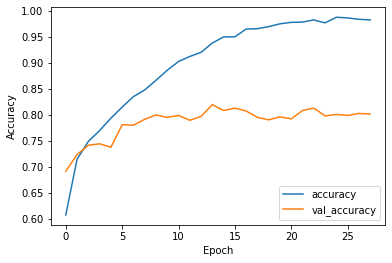

In [160]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)

In [144]:
def convert_to_array(img):
    im = cv2.imread(img)
    img = Image.fromarray(im, 'RGB')
    image = img.resize((50, 50))
    return np.array(image)
def get_animal_name(label):
    if label==0:
        return "cat"
    if label==1:
        return "dog"
    if label==2:
        return "panda"
    if label==3:
        return "car"
def predict_animal(file):
    print("Predicting .................................")
    ar=convert_to_array(file)
    ar=ar/255
    label=1
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    animal=get_animal_name(label_index)
    print(animal)
    print("The predicted thing is a "+animal+" with accuracy =    "+str(acc))
def predict_animal1(file):
    print("Predicting .................................")
    ar=file
    ar=ar/255
    label=1
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    animal=get_animal_name(label_index)
    print(animal)
    print("The predicted thing is a "+animal+" with accuracy =    "+str(acc))


some notes :
    to add more classes we have to just add the reaading image part to the code 
    and add to number of nodes in the dense layer.
    with added functions we can test any photo directly by using predict_animal("address")

In [146]:
#cats=os.listdir("dogs")
#for dog in dogs:
    #print(cat)
    #predict_animal1(car)
   
    

In [147]:
predict_animal("cars/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg")

Predicting .................................
1/1 [==============================] - 0s 266ms/step
[[5.5191390e-10 2.5183863e-07 2.4943472e-13 9.9999976e-01]]
3
car
The predicted thing is a car with accuracy =    0.99999976


In [161]:
score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])


34/34 [==============================] - 0s 10ms/step - loss: 0.8974 - accuracy: 0.8017

 Test accuracy: 0.801699697971344


In [30]:
x_test[0].size

7500

In [32]:
model.predict()

TypeError: predict() missing 1 required positional argument: 'x'

In [149]:
predict_animal("test/dog in car.png")

Predicting .................................
1/1 [==============================] - 0s 16ms/step
[[7.4522078e-02 9.2444164e-01 7.0847523e-06 1.0292223e-03]]
1
dog
The predicted thing is a dog with accuracy =    0.92444164


In [151]:
predict_animal("test/dogcar.jpg")

Predicting .................................
1/1 [==============================] - 0s 14ms/step
[[8.5153541e-04 9.9911207e-01 9.0844238e-10 3.6350455e-05]]
1
dog
The predicted thing is a dog with accuracy =    0.99911207


In [152]:
predict_animal("cars/Acura_ILX_2013_28_16_110_15_4_70_55_179_39_FWD_5_4_4dr_aWg.jpg")

Predicting .................................
1/1 [==============================] - 0s 19ms/step
[[5.5191390e-10 2.5183863e-07 2.4943472e-13 9.9999976e-01]]
3
car
The predicted thing is a car with accuracy =    0.99999976


In [153]:

predict_animal("test/cardog.jfif")

Predicting .................................
1/1 [==============================] - 0s 22ms/step
[[8.9264504e-05 9.9991059e-01 7.9935711e-09 8.7236906e-08]]
1
dog
The predicted thing is a dog with accuracy =    0.9999106


In [155]:
predict_animal("test/cardog1.jfif")

Predicting .................................
1/1 [==============================] - 0s 15ms/step
[[2.2970065e-08 2.7302119e-06 5.9133184e-12 9.9999726e-01]]
3
car
The predicted thing is a car with accuracy =    0.99999726


In [157]:
predict_animal("test/panda1.jpg")

Predicting .................................
1/1 [==============================] - 0s 19ms/step
[[9.9492725e-04 1.6811638e-03 9.9732083e-01 3.1123784e-06]]
2
panda
The predicted thing is a panda with accuracy =    0.99732083


In [158]:
predict_animal("test/catdog.jpg")

Predicting .................................
1/1 [==============================] - 0s 16ms/step
[[1.1890039e-04 9.9988103e-01 1.8084774e-10 2.2781881e-08]]
1
dog
The predicted thing is a dog with accuracy =    0.999881


In [159]:
predict_animal("test/catdog1.jpg")

Predicting .................................
1/1 [==============================] - 0s 15ms/step
[[9.9885738e-01 1.1425376e-03 1.0904812e-12 1.4484905e-07]]
0
cat
The predicted thing is a cat with accuracy =    0.9988574
